## Keras_fashion_minst辨識

In [1]:
import numpy as np  
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import os

In [2]:
(X_trains, y_trains), (X_tests, y_tests)= tf.keras.datasets.fashion_mnist.load_data()
print ("X_trains.shape:",X_trains.shape,"y_trains.shape:", y_trains.shape)

X_trains.shape: (60000, 28, 28) y_trains.shape: (60000,)


y = 0 T-shirt/top


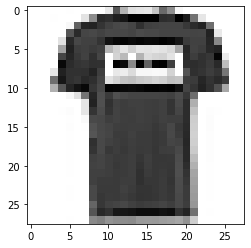

In [3]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9
img = 1
#img = X_trains[4].reshape(28, 28)
label_index = y_trains[img]
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
plt.imshow(X_trains[img], cmap='Greys')

In [4]:
data = X_trains[1].copy()
data[data>0]=1
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(str(data[i])))
text_image


['[0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]',
 '[0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]',
 '[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0]',
 '[0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0]',
 '[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]',
 '[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]',
 '[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0]',
 '[0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0]',
 '[0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0]',
 '[0 0 0

In [5]:
y_TrainOneHot = np_utils.to_categorical(y_trains) 
y_TestOneHot = np_utils.to_categorical(y_tests) 
y_TestOneHot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [6]:
X_train_2D = X_trains.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_tests.reshape(10000, 28*28).astype('float32')  
x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255

In [7]:
# 建立簡單的線性執行的模型
model= keras.models.Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer="normal", activation='relu'))
model.add(Dense(units=10, kernel_initializer="normal", activation="softmax"))
#編譯損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#進行訓練
train_history=model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=25, batch_size=800, verbose=2)

Epoch 1/25


60/60 - 1s - loss: 0.8490 - accuracy: 0.7236 - val_loss: 0.5628 - val_accuracy: 0.8087


Epoch 2/25


60/60 - 1s - loss: 0.5057 - accuracy: 0.8279 - val_loss: 0.4823 - val_accuracy: 0.8320


Epoch 3/25


60/60 - 1s - loss: 0.4450 - accuracy: 0.8477 - val_loss: 0.4365 - val_accuracy: 0.8486


Epoch 4/25


60/60 - 1s - loss: 0.4123 - accuracy: 0.8575 - val_loss: 0.4125 - val_accuracy: 0.8579


Epoch 5/25


60/60 - 1s - loss: 0.3875 - accuracy: 0.8663 - val_loss: 0.4023 - val_accuracy: 0.8570


Epoch 6/25


60/60 - 1s - loss: 0.3727 - accuracy: 0.8702 - val_loss: 0.3813 - val_accuracy: 0.8671


Epoch 7/25


60/60 - 1s - loss: 0.3518 - accuracy: 0.8757 - val_loss: 0.3857 - val_accuracy: 0.8622


Epoch 8/25


60/60 - 1s - loss: 0.3415 - accuracy: 0.8808 - val_loss: 0.3615 - val_accuracy: 0.8717


Epoch 9/25


60/60 - 1s - loss: 0.3263 - accuracy: 0.8857 - val_loss: 0.3549 - val_accuracy: 0.8741


Epoch 10/25


60/60 - 1s - loss: 0.3226 - accuracy: 0.8848 - val_loss: 0.3546 - val_accuracy: 0.8772


Epoch 11/25


60/60 - 1s - loss: 0.3111 - accuracy: 0.8901 - val_loss: 0.3511 - val_accuracy: 0.8748


Epoch 12/25


60/60 - 1s - loss: 0.3044 - accuracy: 0.8907 - val_loss: 0.3564 - val_accuracy: 0.8746


Epoch 13/25


60/60 - 1s - loss: 0.2972 - accuracy: 0.8936 - val_loss: 0.3582 - val_accuracy: 0.8706


Epoch 14/25


60/60 - 1s - loss: 0.2886 - accuracy: 0.8959 - val_loss: 0.3302 - val_accuracy: 0.8833


Epoch 15/25


60/60 - 1s - loss: 0.2833 - accuracy: 0.8990 - val_loss: 0.3407 - val_accuracy: 0.8769


Epoch 16/25


60/60 - 1s - loss: 0.2746 - accuracy: 0.9010 - val_loss: 0.3280 - val_accuracy: 0.8863


Epoch 17/25


60/60 - 1s - loss: 0.2699 - accuracy: 0.9033 - val_loss: 0.3313 - val_accuracy: 0.8822


Epoch 18/25


60/60 - 1s - loss: 0.2629 - accuracy: 0.9061 - val_loss: 0.3266 - val_accuracy: 0.8837


Epoch 19/25


60/60 - 1s - loss: 0.2619 - accuracy: 0.9057 - val_loss: 0.3323 - val_accuracy: 0.8811


Epoch 20/25


60/60 - 1s - loss: 0.2563 - accuracy: 0.9073 - val_loss: 0.3254 - val_accuracy: 0.8811


Epoch 21/25


60/60 - 1s - loss: 0.2466 - accuracy: 0.9126 - val_loss: 0.3155 - val_accuracy: 0.8872


Epoch 22/25


60/60 - 1s - loss: 0.2438 - accuracy: 0.9130 - val_loss: 0.3137 - val_accuracy: 0.8863


Epoch 23/25


60/60 - 1s - loss: 0.2404 - accuracy: 0.9132 - val_loss: 0.3164 - val_accuracy: 0.8862


Epoch 24/25


60/60 - 1s - loss: 0.2347 - accuracy: 0.9162 - val_loss: 0.3209 - val_accuracy: 0.8851


Epoch 25/25


60/60 - 1s - loss: 0.2329 - accuracy: 0.9166 - val_loss: 0.3133 - val_accuracy: 0.8867


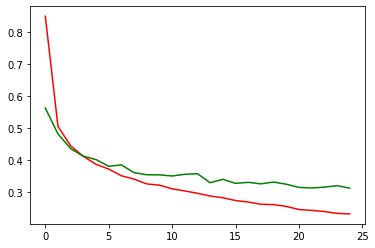

In [8]:
plt.plot(train_history.history["loss"], "r")
plt.plot(train_history.history["val_loss"], "g")

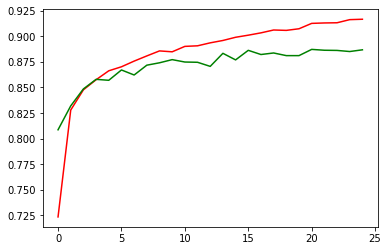

In [9]:
plt.plot(train_history.history["accuracy"], "r")
plt.plot(train_history.history["val_accuracy"], "g")

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
scores = model.evaluate(x_Test_norm, y_TestOneHot)   
print(f"準確度 = {scores[1]*100.0:2.1f}")

  1/313 [..............................] - ETA: 0s - loss: 0.2437 - accuracy: 0.8750



 31/313 [=>............................] - ETA: 0s - loss: 0.3388 - accuracy: 0.8861

 62/313 [====>.........................] - ETA: 0s - loss: 0.3198 - accuracy: 0.8881

 94/313 [========>.....................] - ETA: 0s - loss: 0.3302 - accuracy: 0.8870

124/313 [==========>...................] - ETA: 0s - loss: 0.3437 - accuracy: 0.8821

155/313 [=============>................] - ETA: 0s - loss: 0.3432 - accuracy: 0.8810

187/313 [================>.............] - ETA: 0s - loss: 0.3521 - accuracy: 0.8785

217/313 [===================>..........] - ETA: 0s - loss: 0.3496 - accuracy: 0.8780



246/313 [======================>.......] - ETA: 0s - loss: 0.3397 - accuracy: 0.8810

269/313 [========================>.....] - ETA: 0s - loss: 0.3363 - accuracy: 0.8817

298/313 [===========================>..] - ETA: 0s - loss: 0.3391 - accuracy: 0.8816



313/313 [==============================] - 1s 2ms/step - loss: 0.3371 - accuracy: 0.8823


準確度 = 88.2
